In [1]:
import pandas as pd
import seaborn as sns
app = pd.read_csv(r"C:\Users\My PC\Downloads\applications.csv")
ind = pd.read_csv(r"C:\Users\My PC\Downloads\industries.csv")

In [2]:
#Primele 5 valori
print(app.head())
print(ind.head())

            Applied at   Amount  Age  Gender                      Industry  \
0  11.30.2022 10:26:37  12000.0   29    Male                    Blockchain   
1  11.30.2022 10:26:39      NaN   36    Male  Public services / Government   
2  11.30.2022 10:26:58   7500.0   34    Male          Adtech / Advertising   
3  11.30.2022 10:27:31   1500.0   23  Female                       Telecom   
4  11.30.2022 10:27:34   8400.0   33  Female                    Automotive   

  Marital status  External Rating  \
0          Other              8.0   
1         Single              3.0   
2         Single              4.0   
3         Single              0.0   
4         Single              6.0   

                                     Education level         Location  \
0  Higher Degree (bachelor's, specialist's, maste...    Spain, Madrid   
1  Higher Degree (bachelor's, specialist's, maste...              NaN   
2  Higher Degree (bachelor's, specialist's, maste...   Poland, Warsaw   
3  Higher Degree

In [7]:
# Elimină duplicatele din coloana applicant_id
app = app.drop_duplicates(subset='applicant_id')

In [8]:
# În câmpul External Rating, completează valorile lipsă cu zero
app['External Rating'] = app['External Rating'].fillna(0)

In [9]:
# În câmpul Education level, completează valorile lipsă cu textul "Average"
app['Education level'] = app['Education level'].fillna('Average')

In [11]:
# Adaugă datele din fișierul industries.csv în acest DataFrame, respectiv, evaluările industriilor
ind=ind.rename(columns={'Score':'Industry Score'})
print(ind.head())
df=pd.merge(app,ind)
print(df.head())

                       Industry  Industry Score
0                    Blockchain               0
1  Public services / Government              20
2          Adtech / Advertising              10
3                       Telecom              15
4                    Automotive              15
            Applied at   Amount  Age  Gender                      Industry  \
0  11.30.2022 10:26:37  12000.0   29    Male                    Blockchain   
1  11.30.2022 10:26:39      NaN   36    Male  Public services / Government   
2  11.30.2022 10:26:58   7500.0   34    Male          Adtech / Advertising   
3  11.30.2022 10:27:31   1500.0   23  Female                       Telecom   
4  11.30.2022 10:27:34   8400.0   33  Female                    Automotive   

  Marital status  External Rating  \
0          Other              8.0   
1         Single              3.0   
2         Single              4.0   
3         Single              0.0   
4         Single              6.0   

                    

In [ ]:
# Calculează evaluarea cererii conform următoarelor condiții:
#Evaluarea trebuie să fie un număr între 0 și 100;
#Evaluarea este suma scorurilor pentru cele 6 criterii;
#Evaluarea este zero dacă nu există valoarea Amount sau dacă External Rating este zero.
#Dacă vârsta aplicantului este între 35 și 55 de ani, se adaugă 20 de puncte la evaluare.
#Dacă aplicația a fost depusă în weekend, se adaugă 20 de puncte la evaluare.
#Dacă aplicantul este căsătorit, se adaugă 20 de puncte la evaluare.
#Dacă aplicantul este localizat în Kyiv sau în regiune, se adaugă 10 puncte la evaluare.
#Valoarea Score din tabelul industries.csv este de asemenea adăugată la cerere (și variază între 0 și 20 de puncte).
#Dacă External Rating este mai mare sau egal cu 7, se adaugă 20 de puncte la evaluare.
#Dacă External Rating este mai mic sau egal cu 2, se scad 20 de puncte din evaluare.


In [12]:
#Varsta
df['Age']=df['Age'].astype(int)

In [14]:
# Data aplicarii
df['Applied at']=pd.to_datetime(df['Applied at'],format='mixed')
df['Applied on day']=df['Applied at'].dt.day_name()

In [21]:
# Evaluarea
age = ((df['Age'] >=35)&(df['Age']<=55))* 20
day = df['Applied on day'].isin(['Saturday','Sundey'])*10
marital = (df['Marital status']=='Maried')*20
location = (df['Location']=='Kyiv or region')*10
industry = df['Industry Score']
positive_rating = (df['External Rating']>=7)*20
negative_rating = (df['External Rating']<=2)* -20
df['Final score'] = day + age + marital + location + industry + positive_rating + negative_rating
df['Final score'] = df['Final score']* - (df['External Rating']==0)* -df['Amount'].isna()
df.head()


,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id,Industry Score,Applied on day,Final score
0,2022-11-30 10:26:37,12000.0,29,Male,Blockchain,Other,8.0,"Higher Degree (bachelor's, specialist's, maste...","Spain, Madrid",99e7b0dc6cc05dd334d8f38dc26ce9b3,0,Wednesday,20
1,2022-11-30 10:26:39,NaN,36,Male,Public services / Government,Single,3.0,"Higher Degree (bachelor's, specialist's, maste...",NaN,63dfcf8e6904186650d6814279fbe42f,20,Wednesday,0
2,2022-11-30 10:26:58,7500.0,34,Male,Adtech / Advertising,Single,4.0,"Higher Degree (bachelor's, specialist's, maste...","Poland, Warsaw",10dbafaeb46c09e96b6987c03bbb3498,10,Wednesday,10
3,2022-11-30 10:27:31,1500.0,23,Female,Telecom,Single,0.0,"Higher Degree (bachelor's, specialist's, maste...","Germany, Berlin",5847ac62cc9eac5e323c2517dcc91ad1,15,Wednesday,0
4,2022-11-30 10:27:34,8400.0,33,Female,Automotive,Single,6.0,"Higher Degree (bachelor's, specialist's, maste...","Bulgaria, Sofia",5d21f3795b50de8e8f8f8d5f48b754f3,15,Wednesday,15


In [23]:
# În tabelul rezultat, lasă doar cererile cu o evaluare mai mare decât zero, aceste cereri vor fi considerate acceptate.
df = df[df['Final score']>0]
print(df.head())

            Applied at   Amount  Age  Gender              Industry  \
0  2022-11-30 10:26:37  12000.0   29    Male            Blockchain   
2  2022-11-30 10:26:58   7500.0   34    Male  Adtech / Advertising   
4  2022-11-30 10:27:34   8400.0   33  Female            Automotive   
5  2022-11-30 10:27:38  16500.0   31    Male            E-commerce   
10 2022-11-30 10:28:03  18000.0   25    Male                Dating   

   Marital status  External Rating  \
0           Other              8.0   
2          Single              4.0   
4          Single              6.0   
5          Single              8.0   
10         Single              5.0   

                                      Education level         Location  \
0   Higher Degree (bachelor's, specialist's, maste...    Spain, Madrid   
2   Higher Degree (bachelor's, specialist's, maste...   Poland, Warsaw   
4   Higher Degree (bachelor's, specialist's, maste...  Bulgaria, Sofia   
5   Higher Degree (bachelor's, specialist's, maste... 

            Amount  Age  External Rating  Industry Score  Final score
Applied at                                                           
2022-11-27   11227   30                6              14           27
2022-12-04   10624   30                6              13           24
2022-12-11   10420   30                6              13           25
2022-12-18    9786   30                6              13           26
2022-12-25    9831   31                6              13           25
Axes(0.125,0.11;0.775x0.77)


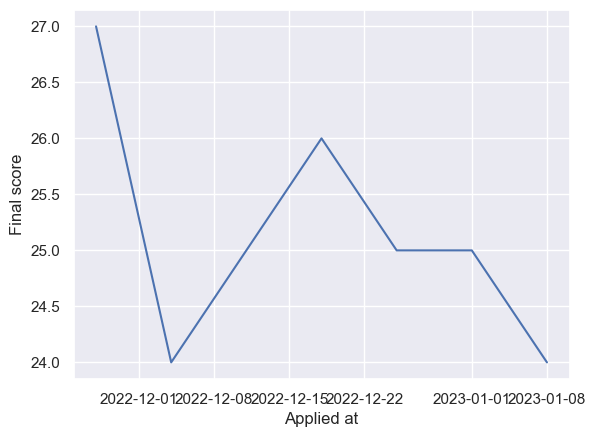

In [25]:
dfg = df.set_index('Applied at')
# Grupează datele din tabelul rezultat în funcție de săptămâna depunerii cererii și afișează evaluarea medie a cererilor acceptate în fiecare săptămână pe grafic.
dfg = dfg.resample('W', label='left').mean(numeric_only= True).astype(int)
print(dfg.head())
sns.set_theme()
print(sns.lineplot(data=dfg,x='Applied at',y='Final score'))